In [2]:

from IPython.display import Image
%matplotlib inline

import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import pandas as pd

df= pd.read_csv('Junction_data_sample.csv', delimiter=';')

df.columns = ['AreaId', 'Receipt', 'TransactionDate', 'BeginHour', 
              'EAN', 'Quantity', 'PersonAgeGrp', 'KCustomer', 'QualClass', 
              'EasyClass']

#### changing the character into integer QualClass
df.loc[df["QualClass"]=="Q_1-3", "QualClass"] = 1
df.loc[df["QualClass"]=="Q_4-7", "QualClass"] = 2
df.loc[df["QualClass"]=="Q_8-10", "QualClass"] =3

#### changing the character into integer EasyClass
df.loc[df["EasyClass"]=="E_1-3", "EasyClass"] = 1
df.loc[df["EasyClass"]=="E_4-7", "EasyClass"] = 2
df.loc[df["EasyClass"]=="E_8-10", "EasyClass"] =3

#### changing the character into integer EasyClass
df.loc[df["KCustomer"]==6711, "KCustomer"] = 1
df.loc[df["KCustomer"]==6712, "KCustomer"] = 2
df.loc[df["KCustomer"]==6713, "KCustomer"] = 3
df.loc[df["KCustomer"]==6714, "KCustomer"] = 4
df.loc[df["KCustomer"]==6715, "KCustomer"] = 5
df.head()


,AreaId,Receipt,TransactionDate,BeginHour,EAN,Quantity,PersonAgeGrp,KCustomer,QualClass,EasyClass
0,1,420049479511690,2019-01-30,18,6410405183637,"1,000000",25-34,2,2,2
1,1,420021025138844,2019-01-30,18,6413605142152,"1,000000",25-34,2,1,2
2,1,420169354058888,2019-01-30,17,6410405105448,"2,000000",45-54,4,1,3
3,1,420056657808976,2019-01-30,19,2000973900008,"1,000000",55-64,4,1,3
4,1,420108906862817,2019-01-30,18,6410405082657,"2,000000",35-44,4,1,3


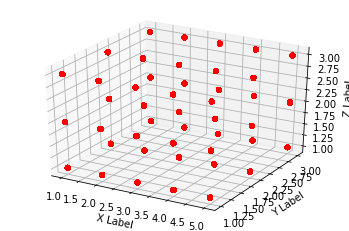

In [4]:
#visualization of our inial data

from sklearn.cluster import KMeans
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

x =df['KCustomer']
y =df['QualClass']
z =df['EasyClass']

ax.scatter(x, y, z, c='r', marker='o')

ax.set_xlabel('X Label')
ax.set_ylabel('Y Label')
ax.set_zlabel('Z Label')

plt.show()

In [5]:
#data= df.copy()
data = pd.DataFrame(df,columns=['KCustomer','QualClass','EasyClass'])
print(data)


       KCustomer  QualClass  EasyClass
0              2          2          2
1              2          1          2
2              4          1          3
3              4          1          3
4              4          1          3
...          ...        ...        ...
61955          2          3          1
61956          2          3          1
61957          2          3          1
61958          2          3          1
61959          2          3          1

[61960 rows x 3 columns]


In [6]:
kmeans=KMeans(3)
kmeans.fit(data)
kmeans.cluster_centers_[:]
import numpy as np
kmeans.cluster_centers_[0]= np.array([1, 3, 1])
kmeans.cluster_centers_[1]= np.array([5, 1, 3])
kmeans.cluster_centers_[:]

array([[1.        , 3.        , 1.        ],
       [5.        , 1.        , 3.        ],
       [3.69234255, 2.40201631, 1.48963525]])

In [7]:
clusters = data.copy()
clusters['cluster_pred']= kmeans.fit_predict(data)
clusters['cluster_pred']

0        2
1        0
2        1
3        1
4        1
        ..
61955    2
61956    2
61957    2
61958    2
61959    2
Name: cluster_pred, Length: 61960, dtype: int32

In [8]:
A= kmeans.cluster_centers_[:]
A

array([[1.26303943, 1.52049053, 2.35291835],
       [4.21893079, 1.6597198 , 2.33285704],
       [2.38985379, 2.63462859, 1.52811304]])

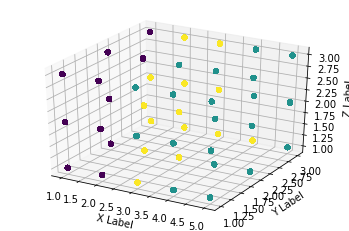

In [9]:
#visualization of our inial data
# 3 classes 0,1,2 

import numpy as np

# Iniializating the centroid of each cluster
kmeans.cluster_centers_[0]= np.array([1, 3, 1])
kmeans.cluster_centers_[1]= np.array([5, 1, 3])
kmeans.cluster_centers_[:]
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

x =df['KCustomer']
y =df['QualClass']
z =df['EasyClass']


ax.scatter(x, y,z, c= clusters['cluster_pred'] ,marker='o')
ax.set_xlabel('X Label')
ax.set_ylabel('Y Label')
ax.set_zlabel('Z Label')

plt.show()

In [10]:
clusters['cluster_pred']

0        2
1        0
2        1
3        1
4        1
        ..
61955    2
61956    2
61957    2
61958    2
61959    2
Name: cluster_pred, Length: 61960, dtype: int32

In [11]:
#kmeans.fit_predict(data.loc[1])

data = pd.DataFrame(df,columns=['KCustomer','QualClass','EasyClass'])

AA=kmeans.fit_predict(data)[1]

data['Receipt'] = df['Receipt']
print(data)

AA=kmeans.fit_predict(data)[1]
AA

       KCustomer  QualClass  EasyClass          Receipt
0              2          2          2  420049479511690
1              2          1          2  420021025138844
2              4          1          3  420169354058888
3              4          1          3  420056657808976
4              4          1          3  420108906862817
...          ...        ...        ...              ...
61955          2          3          1  420018784985580
61956          2          3          1  420018784985580
61957          2          3          1  420018784985580
61958          2          3          1  420018784985580
61959          2          3          1  420018784985580

[61960 rows x 4 columns]


2

In [12]:
#the printing of the user behaviour---wasting food, normal user, Unhealthy food consumation.  


AA=kmeans.fit_predict(data)[1]
if AA!=2:
        print('The user is wasting food')
else:
    if AA!=1:
        print('Natural user') 
    else:
        if AA!=0:
            print('The user eating unhealthy food')
        

the user is wasting food
